In [1]:
import numpy as np
import torch

In [2]:
import pandas as pd

In [3]:
import torch
from torch import nn

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
from pathlib import Path

In [7]:
import csv

In [8]:
CAD_path="/content/logs_4_csv.csv"

In [9]:
df = pd.read_csv('/content/logs_4_csv.csv')
test_df = pd.read_csv('/content/logs_4_csv.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 1 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade  17 non-null     object
dtypes: object(1)
memory usage: 264.0+ bytes


In [10]:
df.sample(5)

,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade
13,29723;1;1;1;20;14;1;1;4
14,29349;1;0;1;26;13;3;1;4
6,29133;1;1;1;20;14;1;1;5
1,26864;2;0;1;NaN;7;3;0;0
8,29346;1;1;1;20;4;1;1;5


In [11]:
df.describe(include=object) #object-type columns

,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade
count,17
unique,17
top,29292;1;1;0;20;23;3;1;5
freq,1


Settings

In [12]:
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [13]:
pd.options.display.float_format = '{:.3f}'.format

In [14]:
df.sample(n=5) # Random sample of rows for checking

,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade
4,26544;4;1;1;21;9;1;1;5
5,29598;11;1;1;25;7;1;1;0
9,26563;4;1;1;21;14;1;1;4
10,26610;4;1;1;21;7;1;1;0
7,26604;2;0;1;23;6;1;1;4


Data clearning

In [15]:
df.isna().sum() #Columns with missing value

ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade    0
dtype: int64

In [16]:
#Fill missing values with the modes
train_modes = df.mode().iloc[0]
train_modes

ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade    23558;4;1;0;NaN;7;3;0;0
Name: 0, dtype: object

In [17]:

def fill_missing(df, modes):
    df = df.fillna(modes)
    return df

df = fill_missing(df, train_modes)

In [18]:
df

,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade
0,29292;1;1;0;20;23;3;1;5
1,26864;2;0;1;NaN;7;3;0;0
2,26861;2;0;1;21;18;1;1;3
3,26760;3;1;0;NaN;8;1;1;5
4,26544;4;1;1;21;9;1;1;5
5,29598;11;1;1;25;7;1;1;0
6,29133;1;1;1;20;14;1;1;5
7,26604;2;0;1;23;6;1;1;4
8,29346;1;1;1;20;4;1;1;5
9,26563;4;1;1;21;14;1;1;4


Dummy variables addition:

In [19]:
def add_dummies(df):
    df = pd.get_dummies(df)
    return df
df = add_dummies(df)

df

,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_23558;4;1;0;NaN;7;3;0;0,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26544;4;1;1;21;9;1;1;5,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26563;4;1;1;21;14;1;1;4,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26604;2;0;1;23;6;1;1;4,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26610;4;1;1;21;7;1;1;0,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26760;3;1;0;NaN;8;1;1;5,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26789;3;1;1;22;12;2;0;0,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26861;2;0;1;21;18;1;1;3,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26864;2;0;1;NaN;7;3;0;0,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29133;1;1;1;20;14;1;1;5,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29292;1;1;0;20;23;3;1;5,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29346;1;1;1;20;4;1;1;5,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29349;1;0;1;26;13;3;1;4,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29350;1;1;1;20;6;1;1;5,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29598;11;1;1;25;7;1;1;0,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29684;1;1;1;NaN;5;2;0;4,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29723;1;1;1;20;14;1;1;4
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
6,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
7,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
9,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Tensors

In [20]:
CADsq_numpy = np.loadtxt(CAD_path, dtype=np.float32,delimiter=";", skiprows=1)

In [21]:
CADsq_numpy

array([[2.9292e+04, 1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+01,
        2.3000e+01, 3.0000e+00, 1.0000e+00, 5.0000e+00],
       [2.6864e+04, 2.0000e+00, 0.0000e+00, 1.0000e+00,        nan,
        7.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00],
       [2.6861e+04, 2.0000e+00, 0.0000e+00, 1.0000e+00, 2.1000e+01,
        1.8000e+01, 1.0000e+00, 1.0000e+00, 3.0000e+00],
       [2.6760e+04, 3.0000e+00, 1.0000e+00, 0.0000e+00,        nan,
        8.0000e+00, 1.0000e+00, 1.0000e+00, 5.0000e+00],
       [2.6544e+04, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.1000e+01,
        9.0000e+00, 1.0000e+00, 1.0000e+00, 5.0000e+00],
       [2.9598e+04, 1.1000e+01, 1.0000e+00, 1.0000e+00, 2.5000e+01,
        7.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00],
       [2.9133e+04, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+01,
        1.4000e+01, 1.0000e+00, 1.0000e+00, 5.0000e+00],
       [2.6604e+04, 2.0000e+00, 0.0000e+00, 1.0000e+00, 2.3000e+01,
        6.0000e+00, 1.0000e+00, 1.0000e+00, 4.0000e+00],


In [22]:
col_list = next(csv.reader(open(CAD_path), delimiter=';'))

In [23]:
CADsq_numpy.shape, col_list

((17, 9),
 ['\ufeffID',
  'Spec',
  'MotherTongue',
  'Gender',
  'Age',
  'Activity',
  'DayPart',
  'Lesson',
  'Grade'])

In [24]:
CADsq = torch.from_numpy(CADsq_numpy)

In [25]:
CADsq.shape, CADsq.dtype

(torch.Size([17, 9]), torch.float32)

In [26]:
data = CADsq[:, :-1]  #select all rows and colomns exept the last

In [27]:
data, data.shape

(tensor([[2.9292e+04, 1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+01, 2.3000e+01,
          3.0000e+00, 1.0000e+00],
         [2.6864e+04, 2.0000e+00, 0.0000e+00, 1.0000e+00,        nan, 7.0000e+00,
          3.0000e+00, 0.0000e+00],
         [2.6861e+04, 2.0000e+00, 0.0000e+00, 1.0000e+00, 2.1000e+01, 1.8000e+01,
          1.0000e+00, 1.0000e+00],
         [2.6760e+04, 3.0000e+00, 1.0000e+00, 0.0000e+00,        nan, 8.0000e+00,
          1.0000e+00, 1.0000e+00],
         [2.6544e+04, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.1000e+01, 9.0000e+00,
          1.0000e+00, 1.0000e+00],
         [2.9598e+04, 1.1000e+01, 1.0000e+00, 1.0000e+00, 2.5000e+01, 7.0000e+00,
          1.0000e+00, 1.0000e+00],
         [2.9133e+04, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+01, 1.4000e+01,
          1.0000e+00, 1.0000e+00],
         [2.6604e+04, 2.0000e+00, 0.0000e+00, 1.0000e+00, 2.3000e+01, 6.0000e+00,
          1.0000e+00, 1.0000e+00],
         [2.9346e+04, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000

In [28]:
target = CADsq[:, -1]  #select all rows

In [29]:
target, target.shape

(tensor([5., 0., 3., 5., 5., 0., 5., 4., 5., 4., 0., 0., 4., 4., 4., 5., 0.]),
 torch.Size([17]))

In [30]:
target = CADsq[:, -1] .long() #labels as an integrated vector

In [31]:
target

tensor([5, 0, 3, 5, 5, 0, 5, 4, 5, 4, 0, 0, 4, 4, 4, 5, 0])

In [32]:
target_onehot = torch.zeros(target.shape[0], 9) #score  1* (1,0,0,0,0,0,0,0,0) score  5* (0,0,0,0,1,0,0,0,0)
target_onehot.scatter_(1, target.unsqueeze(1), 1.0)

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [33]:
target_unsqueezed = target.unsqueeze(1)

In [34]:
target_unsqueezed

tensor([[5],
        [0],
        [3],
        [5],
        [5],
        [0],
        [5],
        [4],
        [5],
        [4],
        [0],
        [0],
        [4],
        [4],
        [4],
        [5],
        [0]])

In [35]:
data_mean =torch.mean(data, dim=0) #Categorizing
data_mean

tensor([2.7802e+04, 2.7059e+00, 7.6471e-01, 8.2353e-01,        nan, 1.0235e+01,
        1.5882e+00, 7.6471e-01])

In [36]:
data_var=torch.var(data, dim=0)
data_var

tensor([3.0928e+06, 6.0956e+00, 1.9118e-01, 1.5441e-01,        nan, 2.6691e+01,
        7.5735e-01, 1.9118e-01])

In [37]:
data_normalized= (data - data_mean) / torch.sqrt(data_var)  #data normalization
data_normalized

tensor([[ 0.8474, -0.6909,  0.5381, -2.0957,     nan,  2.4707,  1.6222,  0.5381],
        [-0.5332, -0.2859, -1.7489,  0.4491,     nan, -0.6262,  1.6222, -1.7489],
        [-0.5349, -0.2859, -1.7489,  0.4491,     nan,  1.5029, -0.6759,  0.5381],
        [-0.5923,  0.1191,  0.5381, -2.0957,     nan, -0.4327, -0.6759,  0.5381],
        [-0.7151,  0.5242,  0.5381,  0.4491,     nan, -0.2391, -0.6759,  0.5381],
        [ 1.0214,  3.3594,  0.5381,  0.4491,     nan, -0.6262, -0.6759,  0.5381],
        [ 0.7570, -0.6909,  0.5381,  0.4491,     nan,  0.7287, -0.6759,  0.5381],
        [-0.6810, -0.2859, -1.7489,  0.4491,     nan, -0.8198, -0.6759,  0.5381],
        [ 0.8781, -0.6909,  0.5381,  0.4491,     nan, -1.2069, -0.6759,  0.5381],
        [-0.7043,  0.5242,  0.5381,  0.4491,     nan,  0.7287, -0.6759,  0.5381],
        [-0.6776,  0.5242,  0.5381,  0.4491,     nan, -0.6262, -0.6759,  0.5381],
        [-0.5758,  0.1191,  0.5381,  0.4491,     nan,  0.3416,  0.4732, -1.7489],
        [ 1.0703

In [38]:
low_grade = target <= 2
low_grade.shape, low_grade.dtype, low_grade.sum()

(torch.Size([17]), torch.bool, tensor(5))

In [39]:
low_data = data[low_grade]
low_data.shape

torch.Size([5, 8])

In [40]:
low_data - data[target <= 2]
mid_data = data [ (target > 2) & (target < 5)]
high_data = data[target >= 3]

In [41]:
low_mean = torch.mean(low_data, dim=0)
mid_mean = torch.mean(mid_data, dim= 0)
high_mean = torch.mean(high_data, dim= 0)

In [42]:
for i, args in enumerate(zip(col_list, low_mean, mid_mean, high_mean)):
  print('{:2} {:10} {:7.6f} {:7.6f} {:7.6f}'.format(i, *args))

 0 ﻿ID        26683.800781 28130.666016 28267.416016
 1 Spec       4.800000 1.833333 1.833333
 2 MotherTongue 0.800000 0.500000 0.750000
 3 Gender     0.800000 1.000000 0.833333
 4 Age            nan     nan     nan
 5 Activity   8.000000 11.666667 11.166667
 6 DayPart    2.000000 1.500000 1.416667
 7 Lesson     0.400000 0.833333 0.916667


In [43]:
Activity_threshold = 11.67
Activity_data = data[:,7]

In [44]:
predicted_indexes = torch.lt(Activity_data,Activity_threshold)

In [45]:
predicted_indexes.shape, predicted_indexes.dtype,
predicted_indexes.sum()

tensor(17)

In [46]:
actual_indexes = target > 2
actual_indexes.shape, actual_indexes.dtype,
actual_indexes.sum()

tensor(12)

In [47]:
n_matches = torch.sum(actual_indexes &predicted_indexes) .item()

In [48]:
n_predicted = torch.sum(predicted_indexes) .item()
n_actual = torch.sum(actual_indexes) .item()
n_matches, n_matches / n_predicted, n_matches / n_actual

(12, 0.7058823529411765, 1.0)

In [49]:
df

,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_23558;4;1;0;NaN;7;3;0;0,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26544;4;1;1;21;9;1;1;5,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26563;4;1;1;21;14;1;1;4,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26604;2;0;1;23;6;1;1;4,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26610;4;1;1;21;7;1;1;0,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26760;3;1;0;NaN;8;1;1;5,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26789;3;1;1;22;12;2;0;0,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26861;2;0;1;21;18;1;1;3,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26864;2;0;1;NaN;7;3;0;0,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29133;1;1;1;20;14;1;1;5,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29292;1;1;0;20;23;3;1;5,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29346;1;1;1;20;4;1;1;5,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29349;1;0;1;26;13;3;1;4,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29350;1;1;1;20;6;1;1;5,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29598;11;1;1;25;7;1;1;0,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29684;1;1;1;NaN;5;2;0;4,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29723;1;1;1;20;14;1;1;4
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
6,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
7,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
9,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Training

In [50]:
import numpy as np
import torch

t_g Grade and t_a Activity

In [54]:
t_g = [5, 0, 3, 5, 5, 0, 5, 4, 5, 4, 0, 0, 4, 4, 4, 5, 0]
t_a = (23, 7, 18, 8, 9, 7, 14, 6, 4, 14, 7, 12, 5, 14, 13, 6, 7)

In [55]:
t_g = torch.tensor(t_g)
t_a = torch.tensor(t_a)

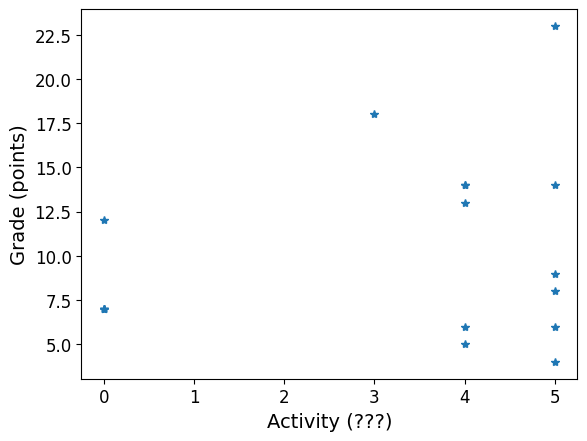

In [56]:
%matplotlib inline
from matplotlib import pyplot as plt

fig = plt.figure(dpi=100)
plt.xlabel("Activity (???)")
plt.ylabel("Grade (points)")
plt.plot(t_g, t_a, '*')

Model

In [57]:
def model(t_a, w, b): return w *t_a + b #(w - weight, b-bTas)

In [58]:
def loss_fn(t_p, t_g):
    squared_diffs =(t_p - t_g)**2
    return squared_diffs.mean()

In [59]:
w=torch.ones(())
b=torch.zeros(())

t_p = model(t_a, w, b)
t_p

tensor([23.,  7., 18.,  8.,  9.,  7., 14.,  6.,  4., 14.,  7., 12.,  5., 14.,
        13.,  6.,  7.])

In [60]:
loss= loss_fn(t_p, t_g)
loss

tensor(75.4706)

In [61]:
delta=0.1 # gradient descent

In [62]:
loss_rate_of_change_w = \
    (loss_fn(model(t_a, w + delta, b), t_g) - loss_fn(model(t_a, w - delta, b), t_g))/ (2.0 *delta)

In [63]:
learning_rate=1e-2

In [64]:
w=w - learning_rate * loss_rate_of_change_w

In [65]:
loss_rate_of_change_b=\
    (loss_fn(model(t_a, w, b + delta), t_g) -
    loss_fn(model(t_a, w, b - delta), t_g))/ (2.0*delta)

b=b-learning_rate*loss_rate_of_change_b

In [66]:
def dloss_fn(t_p, t_g): #derivate of loss is computed
    dsq_diffs = 2 *(t_p - t_g) / t_p.size(0)
    return dsq_diffs

In [67]:
def dmodel_dw(t_a, w, b):
   return t_a

In [68]:
def dmodel_db(t_a, w, b):
   return 1.0

Gradient

In [69]:
def grad_fn(t_a, t_g, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_g)
    dloss_dw = dloss_dtp * dmodel_dw(t_a, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_a, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

Iterating to fit

In [70]:
def training_loop(n_epochs, learning_rate, params, t_a, t_g, print_params=True):
   for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_a, w, b) # Forward pass
        loss = loss_fn(t_p, t_g)
        grad = grad_fn(t_a, t_g, t_p, w, b) # backward pass

        params = params-learning_rate*grad
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
   return params

In [71]:
training_loop( n_epochs = 100, learning_rate = 1e-4, params =torch.tensor([1.0, 0.0]),t_a = t_a,t_g=t_g)

Epoch 1, Loss 75.470589
Epoch 2, Loss 71.839066
Epoch 3, Loss 68.394897
Epoch 4, Loss 65.128426
Epoch 5, Loss 62.030487
Epoch 6, Loss 59.092358
Epoch 7, Loss 56.305817
Epoch 8, Loss 53.663040
Epoch 9, Loss 51.156597
Epoch 10, Loss 48.779476
Epoch 11, Loss 46.524990
Epoch 12, Loss 44.386814
Epoch 13, Loss 42.358959
Epoch 14, Loss 40.435711
Epoch 15, Loss 38.611702
Epoch 16, Loss 36.881779
Epoch 17, Loss 35.241108
Epoch 18, Loss 33.685085
Epoch 19, Loss 32.209328
Epoch 20, Loss 30.809713
Epoch 21, Loss 29.482302
Epoch 22, Loss 28.223373
Epoch 23, Loss 27.029398
Epoch 24, Loss 25.897011
Epoch 25, Loss 24.823044
Epoch 26, Loss 23.804489
Epoch 27, Loss 22.838476
Epoch 28, Loss 21.922298
Epoch 29, Loss 21.053391
Epoch 30, Loss 20.229301
Epoch 31, Loss 19.447725
Epoch 32, Loss 18.706469
Epoch 33, Loss 18.003454
Epoch 34, Loss 17.336702
Epoch 35, Loss 16.704351
Epoch 36, Loss 16.104622
Epoch 37, Loss 15.535830
Epoch 38, Loss 14.996376
Epoch 39, Loss 14.484751
Epoch 40, Loss 13.999519
Epoch 41,

tensor([ 0.3195, -0.0451])

In [72]:
training_loop(
    n_epochs = 100,
    learning_rate = 1e-4,
    params = torch.tensor([1.0, 0.0]),
    t_a = t_a,
    t_g = t_g)

Epoch 1, Loss 75.470589
Epoch 2, Loss 71.839066
Epoch 3, Loss 68.394897
Epoch 4, Loss 65.128426
Epoch 5, Loss 62.030487
Epoch 6, Loss 59.092358
Epoch 7, Loss 56.305817
Epoch 8, Loss 53.663040
Epoch 9, Loss 51.156597
Epoch 10, Loss 48.779476
Epoch 11, Loss 46.524990
Epoch 12, Loss 44.386814
Epoch 13, Loss 42.358959
Epoch 14, Loss 40.435711
Epoch 15, Loss 38.611702
Epoch 16, Loss 36.881779
Epoch 17, Loss 35.241108
Epoch 18, Loss 33.685085
Epoch 19, Loss 32.209328
Epoch 20, Loss 30.809713
Epoch 21, Loss 29.482302
Epoch 22, Loss 28.223373
Epoch 23, Loss 27.029398
Epoch 24, Loss 25.897011
Epoch 25, Loss 24.823044
Epoch 26, Loss 23.804489
Epoch 27, Loss 22.838476
Epoch 28, Loss 21.922298
Epoch 29, Loss 21.053391
Epoch 30, Loss 20.229301
Epoch 31, Loss 19.447725
Epoch 32, Loss 18.706469
Epoch 33, Loss 18.003454
Epoch 34, Loss 17.336702
Epoch 35, Loss 16.704351
Epoch 36, Loss 16.104622
Epoch 37, Loss 15.535830
Epoch 38, Loss 14.996376
Epoch 39, Loss 14.484751
Epoch 40, Loss 13.999519
Epoch 41,

tensor([ 0.3195, -0.0451])

Input normalizing

In [73]:
t_an = 0.1 *t_a

In [74]:
training_loop(n_epochs = 100, learning_rate = 1e-4, params =torch.tensor([1.0, 0.0]),t_a = t_an,t_g = t_g)

Epoch 1, Loss 8.510588
Epoch 2, Loss 8.507029
Epoch 3, Loss 8.503472
Epoch 4, Loss 8.499920
Epoch 5, Loss 8.496370
Epoch 6, Loss 8.492823
Epoch 7, Loss 8.489281
Epoch 8, Loss 8.485741
Epoch 9, Loss 8.482203
Epoch 10, Loss 8.478667
Epoch 11, Loss 8.475136
Epoch 12, Loss 8.471608
Epoch 13, Loss 8.468082
Epoch 14, Loss 8.464561
Epoch 15, Loss 8.461041
Epoch 16, Loss 8.457525
Epoch 17, Loss 8.454013
Epoch 18, Loss 8.450502
Epoch 19, Loss 8.446996
Epoch 20, Loss 8.443491
Epoch 21, Loss 8.439992
Epoch 22, Loss 8.436493
Epoch 23, Loss 8.432999
Epoch 24, Loss 8.429506
Epoch 25, Loss 8.426018
Epoch 26, Loss 8.422534
Epoch 27, Loss 8.419050
Epoch 28, Loss 8.415570
Epoch 29, Loss 8.412095
Epoch 30, Loss 8.408621
Epoch 31, Loss 8.405150
Epoch 32, Loss 8.401684
Epoch 33, Loss 8.398218
Epoch 34, Loss 8.394757
Epoch 35, Loss 8.391299
Epoch 36, Loss 8.387844
Epoch 37, Loss 8.384392
Epoch 38, Loss 8.380942
Epoch 39, Loss 8.377496
Epoch 40, Loss 8.374052
Epoch 41, Loss 8.370612
Epoch 42, Loss 8.367175
E

tensor([1.0415, 0.0410])

In [75]:
training_loop(n_epochs = 5000, learning_rate = 1e-4, params =torch.tensor([1.0, 0.0]),t_a = t_an,t_g = t_g)

Epoch 1, Loss 8.510588
Epoch 2, Loss 8.507029
Epoch 3, Loss 8.503472
Epoch 4, Loss 8.499920
Epoch 5, Loss 8.496370
Epoch 6, Loss 8.492823
Epoch 7, Loss 8.489281
Epoch 8, Loss 8.485741
Epoch 9, Loss 8.482203
Epoch 10, Loss 8.478667
Epoch 11, Loss 8.475136
Epoch 12, Loss 8.471608
Epoch 13, Loss 8.468082
Epoch 14, Loss 8.464561
Epoch 15, Loss 8.461041
Epoch 16, Loss 8.457525
Epoch 17, Loss 8.454013
Epoch 18, Loss 8.450502
Epoch 19, Loss 8.446996
Epoch 20, Loss 8.443491
Epoch 21, Loss 8.439992
Epoch 22, Loss 8.436493
Epoch 23, Loss 8.432999
Epoch 24, Loss 8.429506
Epoch 25, Loss 8.426018
Epoch 26, Loss 8.422534
Epoch 27, Loss 8.419050
Epoch 28, Loss 8.415570
Epoch 29, Loss 8.412095
Epoch 30, Loss 8.408621
Epoch 31, Loss 8.405150
Epoch 32, Loss 8.401684
Epoch 33, Loss 8.398218
Epoch 34, Loss 8.394757
Epoch 35, Loss 8.391299
Epoch 36, Loss 8.387844
Epoch 37, Loss 8.384392
Epoch 38, Loss 8.380942
Epoch 39, Loss 8.377496
Epoch 40, Loss 8.374052
Epoch 41, Loss 8.370612
Epoch 42, Loss 8.367175
E

tensor([1.7950, 0.9302])